<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Random Numbers (Need)</span></div>

## 1 Random Numbers

### 1.1 Real and Pseudo Random Numbers
Real random number generators use random physical processes (e.g. radioactivity or noise in circuits) to generate random numbers.\
Psuedo random number generators produce a stream of numbers that approximate real random numbers.


In [2]:
def getRandomNumber():
    return 4 # chosen by fair dice roll.
    # totally guaranteed to be random.

### 1.2 NumPy’s PRNG

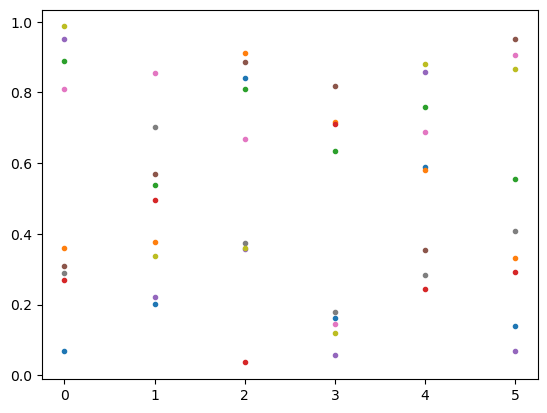

In [5]:
import matplotlib.pyplot as plt
plt.plot(np.random.rand(6,9),'.')
# uniform distribution [0,1)

In [17]:
n = 10000
random_numbers = np.random.rand(n)
# The numbers less than .5 must be about 50%
np.sum(random_numbers < .5) / n * 100

49.65

In [19]:
# The numbers less than .25 must be about 25%
np.sum(random_numbers < .25) / n * 100

24.529999999999998

In [21]:
# The numbers more than .75 must be about 25%
np.sum(random_numbers > .75) / n * 100

25.55

### 1.3 A simple graphical test

Text(0, 0.5, 'Value of random number')

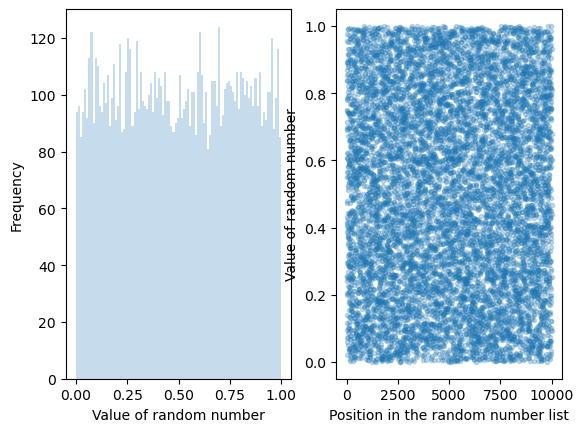

In [10]:
n = 10000
random_numbers = np.random.rand(n)

fig, ax = plt.subplots(nrows=1, ncols=2)

axis = ax[0]
axis.hist(random_numbers, bins=100, alpha=.25)
axis.set_xlabel("Value of random number")
axis.set_ylabel("Frequency")

axis = ax[1]
axis.scatter(range(n), random_numbers, marker='.', alpha=.25)
axis.set_xlabel("Position in the random number list")
axis.set_ylabel("Value of random number")

### 1.4 Uniformly beyond \([0,1)\)

Text(0, 0.5, 'Value of random number')

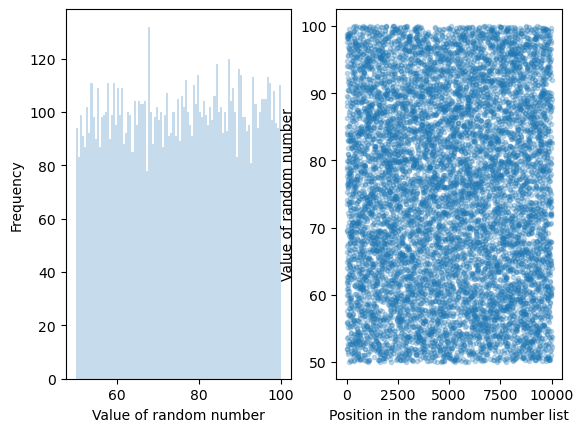

In [9]:
n = 10000
random_numbers = np.random.uniform(low=50, high=100, size=n)

fig, ax = plt.subplots(nrows=1, ncols=2)

axis = ax[0]
axis.hist(random_numbers, bins=100, alpha=.25)
axis.set_xlabel("Value of random number")
axis.set_ylabel("Frequency")

axis = ax[1]
axis.scatter(range(n), random_numbers, marker='.', alpha=.25)
axis.set_xlabel("Position in the random number list")
axis.set_ylabel("Value of random number")

### 1.5 ‘seeding’ a PRNG
You must call the seed again when you generate a new random list

In [30]:
np.random.randint(0, 100, 10)     # Ten integers between 0 and 100

array([ 3, 44, 51, 97, 34, 85, 84,  7, 42,  7])

In [31]:
np.random.randint(0, 100, 10)     # Ten integers between 0 and 100

array([63, 65, 40, 39, 98, 29, 56, 81, 41, 41])

In [32]:
np.random.seed(1234)              # Specifying a seed
np.random.randint(0, 100, 10)     # Ten integers between 0 and 100

array([47, 83, 38, 53, 76, 24, 15, 49, 23, 26])

In [34]:
np.random.seed(1234)
np.random.randint(0, 100, 10)     # Same ten integers between 0 and 100

array([30, 43, 30, 26, 58, 92, 69, 80, 73, 47])

## 2 Simulating a Magic-8 Ball

In [35]:
def shake_magic_8():
    '''
    Function to simulate a Magic-8 ball!
    '''
    options = ['It is certain.', 'It is decidedly so.',
               'Without a doubt.', 'Yes definitely.',
               'You may rely on it.', 'As I see it, yes.',
               'Most likely.', 'Outlook good.',
               'Yes.', 'Signs point to yes.',
               'Reply hazy, try again.', 'Ask again later.',
               'Better not tell you now.', 'Cannot predict now.',
               'Concentrate and ask again.', 'Don\'t count on it.',
               'My reply is no.', 'My sources say no.',
               'Outlook not so good.', 'Very doubtful.']

    return np.random.choice(options)


In [37]:
questions = ['Will I be pretty?',
             'Will I be rich?',
             'Will I be in trouble?']

for question in questions:
    print(f'Q: {question}')
    print(f'A: {shake_magic_8()}\n')

Q: Will I be pretty?
A: As I see it, yes.

Q: Will I be rich?
A: Without a doubt.

Q: Will I be in trouble?
A: Most likely.



The most YZ responses. Correct or not??

## 3 Flipping Coins

### 3.1 A fair coin

In [57]:
#Compare % heads given by both methods
no_of_coins = 1_000
no_of_heads = np.sum(np.random.choice(['Head', 'Tails'], no_of_coins)=='Head')

print(f'Number of heads: {no_of_heads/no_of_coins*100:.2f}%')

def flip_coins(no_of_coins=1, probability=.5):
    '''
    Returns the number of values greater that 
    `probability` (considered as 'Heads').
    '''
    results = np.random.rand(no_of_coins)
    no_of_heads = np.sum(results > probability)
    return no_of_heads

no_of_heads = flip_coins(no_of_coins)
print(f'Number of heads: {no_of_heads/no_of_coins*100:.2f}%')

Number of heads: 50.90%
Number of heads: 50.60%


### 3.2 A biased coin

In [58]:
no_of_coins = 1_000
no_of_heads = flip_coins(no_of_coins, probability = .3)
print(f'Number of heads: {no_of_heads/no_of_coins*100:.2f}%')

Number of heads: 70.80%


### 3.3 A flipping experiment

In [67]:
import scipy
from scipy.stats import binom
#binomial distribution query with x=7, 10 trials and prob 0.5
binom.pmf(k=7, n=10, p=.5)
binomial_probabilities = binom.pmf(k=no_of_heads, n=10, p=.5)

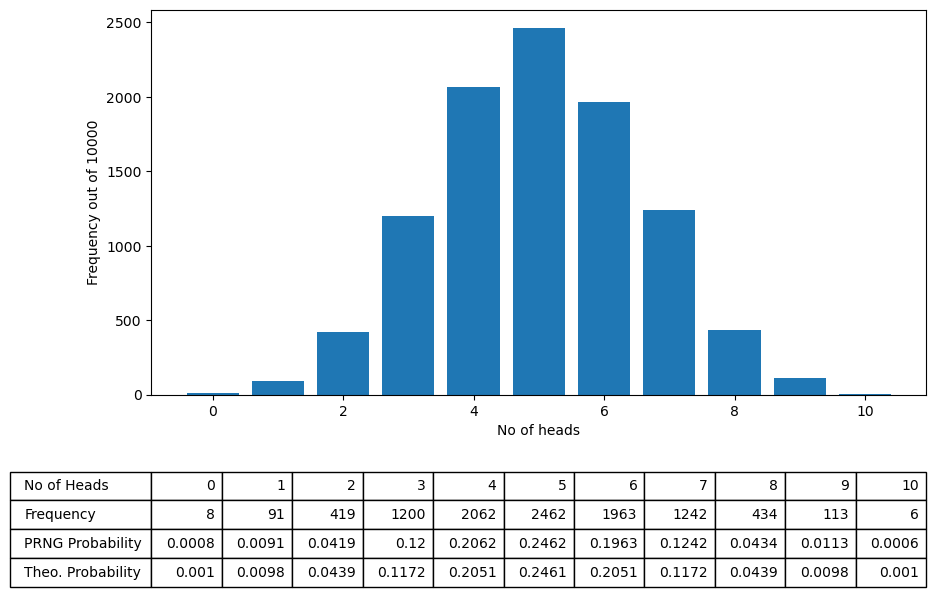

In [71]:
no_of_repeats = 10_000
result = [flip_coins(no_of_coins=10) for _ in range(no_of_repeats)]
no_of_heads, heads_counts = np.unique(result, return_counts=True)
heads_probability = heads_counts/no_of_repeats
plt.rcParams['figure.figsize'] = (10,5)
plt.bar(no_of_heads, heads_counts);
plt.xlabel('No of heads')
plt.ylabel(f'Frequency out of {no_of_repeats}')
plt.table([no_of_heads, heads_counts, heads_probability,np.round(binomial_probabilities,4)],
          rowLabels=['No of Heads', 'Frequency', 'PRNG Probability','Theo. Probability'],
          loc='bottom',
          bbox=[0, -0.5, 1, 0.3])

## Exercise 1 :  12C, 13C
$\sigma = \sum x^2 - \frac{(\sum x)^2}{n}$

In [199]:
no_of_coins = 27
n = 10000
c_13 = []
for i in range(n):
    c_13.append(np.sum(flip_coins(no_of_coins, probability = .9889)))
print(np.mean(c_13),np.std(c_13))

0.3091 0.5515044786762842


In [200]:
print(np.sum(np.array(c_13)==0)/n)

0.7322


In [201]:
#just verifying
print(binom.pmf(k=0, n=27, p=.0111))

0.7397997429318268
